## Logistic Regression

+ 이름은 회귀이지만, 클래스가 2개인 이진분류를 위한 모델이다.
+ 선형회귀모델에 시그모이드 함수를 적용해 0 또는 1에 수렴하도록 하는 방식이다.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [134]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

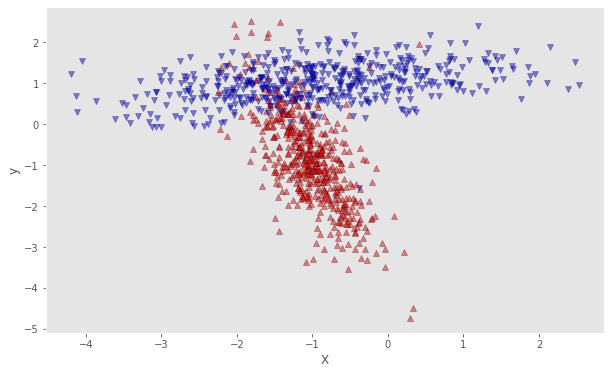

In [135]:
X, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(1000):
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='^', color='r')
    else:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha=0.5, marker='v', color='b')
plt.show();

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LogisticRegression()

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.91
평가데이터 점수 : 0.89


In [137]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)

print(f'교차검증 평균점수 : {scores.mean()}')

교차검증 평균점수 : 0.9030000000000001


C:\Users\yeonok\AppData\Local\Temp/ipykernel_3804/2927195872.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


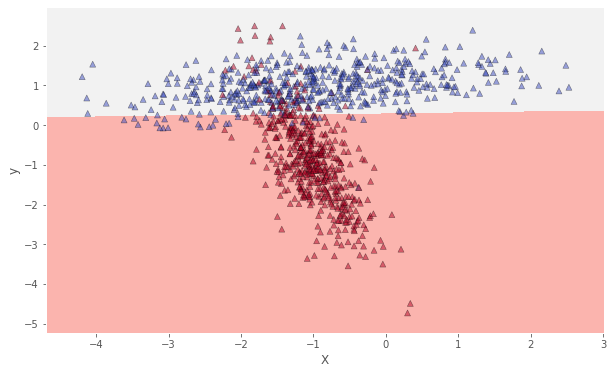

In [138]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c=np.abs(y-1), edgecolors='k', alpha=0.5, marker='^', cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()
plt.show();

## Iris 데이터셋 이용해보기
+ sepal(꽃받침)의 length, width, petal(꽃잎)의 length, width 를 이용해
+ 3개 클래스 중 어떤 붓꽃에 해당하는지 분류하기 위한 데이터셋 

In [139]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [140]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
df['species'] = species

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


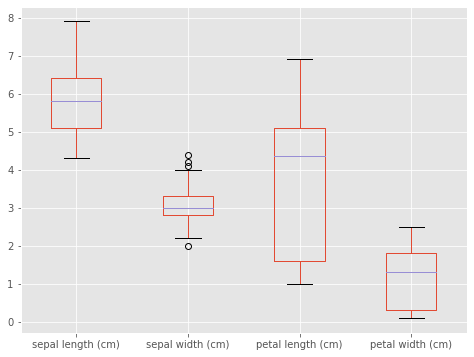

In [141]:
df.boxplot(figsize=(8,6));

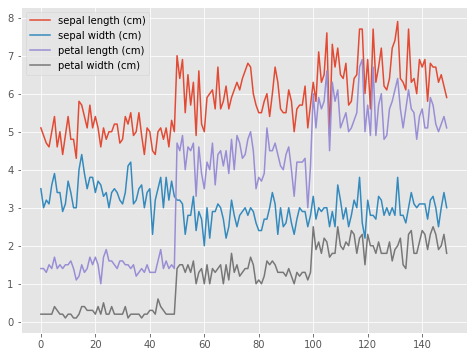

In [142]:
df.plot(figsize=(8,6));

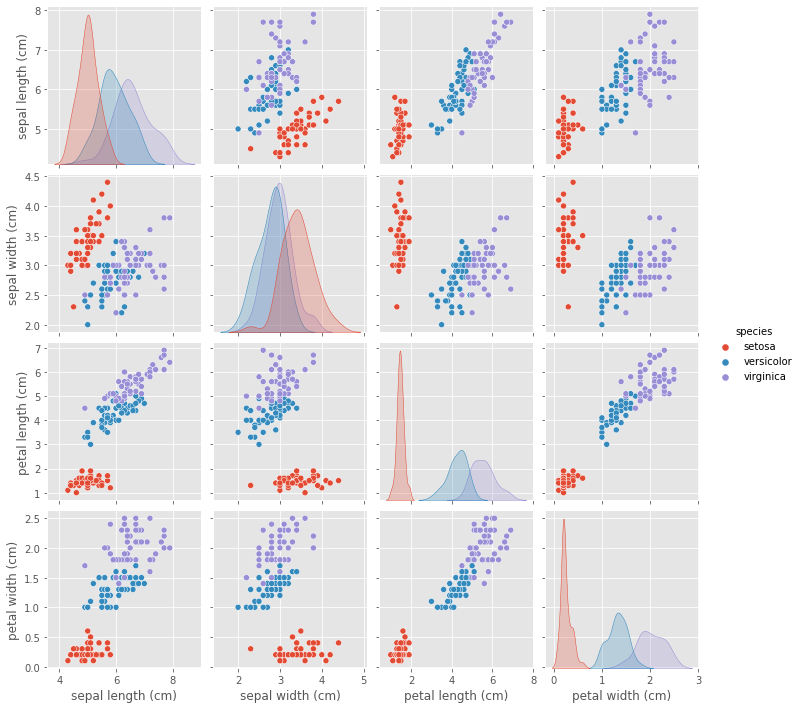

In [143]:
import seaborn as sns

sns.pairplot(df, hue='species');
#setosa종은 비교적 특성이 뚜렷하지만, versicolor와 virginica는 겹쳐서 분포하는 경우가 꽤 있어보임

In [144]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2,3]], iris.target, test_size=0.2,   #petal 특성만 사용
                                                    random_state=1, stratify=iris.target)

model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=1)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9666666666666667
평가데이터 점수 : 0.9666666666666667


In [145]:
X = np.vstack((X_train, X_test))    
y = np.hstack((y_train, y_test))   

X.shape, y.shape

((150, 2), (150,))

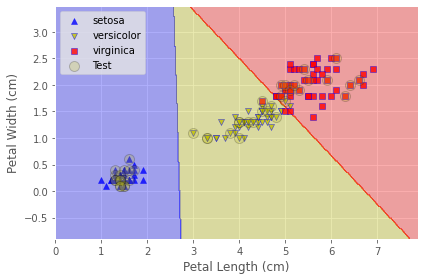

In [146]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1   #Petal Length
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1   #Petal Width

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ('setosa', 'versicolor', 'virginica')
markers = ('^', 'v', 's')
colors = ('b', 'y', 'r')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=species[cl],
                edgecolor='b')
    
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
            c='y', edgecolor='k', alpha=0.2, linewidth=1, 
            marker='o', s=100, label='Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.tight_layout();

In [147]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

result = gs.fit(iris.data, iris.target)

print(gs.best_estimator_)
print(f'최적 점수 : {gs.best_score_}')
print(f'최적 파라미터 : {gs.best_params_}')

LogisticRegression(C=2.4)
최적 점수 : 0.9800000000000001
최적 파라미터 : {'C': 2.4, 'penalty': 'l2'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

In [148]:
result_df = pd.DataFrame(result.cv_results_)
result_df.loc[:,['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'C': 2.4, 'penalty': 'l2'}",0.980000,1
7,"{'C': 2.6, 'penalty': 'l2'}",0.980000,1
9,"{'C': 2.8, 'penalty': 'l2'}",0.980000,1
1,"{'C': 2.0, 'penalty': 'l2'}",0.973333,4
3,"{'C': 2.2, 'penalty': 'l2'}",0.973333,4
0,"{'C': 2.0, 'penalty': 'l1'}",NaN,6
2,"{'C': 2.2, 'penalty': 'l1'}",NaN,7
4,"{'C': 2.4, 'penalty': 'l1'}",NaN,8
6,"{'C': 2.6, 'penalty': 'l1'}",NaN,9
8,"{'C': 2.8, 'penalty': 'l1'}",NaN,10


## 유방암 데이터 사용해보기
+ 양성/음성 여부를 이진분류하기 위한 데이터(569 * 31)

In [149]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [150]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [151]:
print(f'양성인 데이터의 비율 : {round(cancer.target.sum() / len(cancer.target) * 100, 2)} %')

양성인 데이터의 비율 : 62.74 %


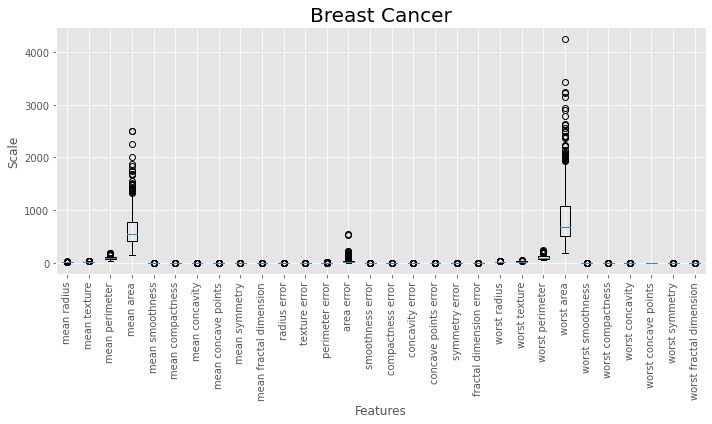

In [152]:
fig = plt.figure(figsize=(10,6))
plt.title('Breast Cancer', size=20)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout();
#mean area, worst area 특성 외에는 데이터의 scale 자체가 작아 모델에 설명력에 크게 기여하지는 않을 것으로 예상

In [153]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9560439560439561
평가데이터 점수 : 0.9385964912280702


In [157]:
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

result = gs.fit(cancer.data, cancer.target)

print(gs.best_estimator_)
print(f'최적 점수 : {gs.best_score_}')
print(f'최적 파라미터 : {gs.best_params_}')

LogisticRegression(C=2.8)
최적 점수 : 0.9525689223057643
최적 파라미터 : {'C': 2.8, 'penalty': 'l2'}


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

In [158]:
result_df = pd.DataFrame(result.cv_results_)
result_df.loc[:,['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
9,"{'C': 2.8, 'penalty': 'l2'}",0.952569,1
7,"{'C': 2.6, 'penalty': 'l2'}",0.949060,2
3,"{'C': 2.2, 'penalty': 'l2'}",0.947306,3
1,"{'C': 2.0, 'penalty': 'l2'}",0.945551,4
5,"{'C': 2.4, 'penalty': 'l2'}",0.945520,5
0,"{'C': 2.0, 'penalty': 'l1'}",NaN,6
2,"{'C': 2.2, 'penalty': 'l1'}",NaN,7
4,"{'C': 2.4, 'penalty': 'l1'}",NaN,8
6,"{'C': 2.6, 'penalty': 'l1'}",NaN,9
8,"{'C': 2.8, 'penalty': 'l1'}",NaN,10


## SGD(확률적 경사하강법) 사용해보기
+ 모델을 학습시키기 위한 방법으로, 손실함수의 기울기가 최소화되는 방향으로 학습
+ sklearn에서는 선형SGD회귀와 SGD분류를 지원

In [154]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = make_pipeline(StandardScaler(),
                      SGDRegressor(loss='squared_loss'))

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.7278107339351234
평가데이터 점수 : 0.7779151575807184


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [155]:
from sklearn.linear_model import SGDClassifier

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = make_pipeline(StandardScaler(),
                      SGDClassifier(loss='log'))  #로지스틱일 때 경사하강법의 손실함수 = log

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9666666666666667
평가데이터 점수 : 0.9666666666666667


In [156]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = make_pipeline(StandardScaler(),
                      SGDClassifier(loss='log'))  #로지스틱일 때 경사하강법의 손실함수 = log

model.fit(X_train, y_train)

print(f'학습데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}')

학습데이터 점수 : 0.9714285714285714
평가데이터 점수 : 0.9736842105263158
